#### Load modules

Install Detectron2 from [Facebook's Research Github](https://github.com/facebookresearch/detectron2) and, Imprep preferably, in a new conda environment.



In [1]:
import imprep
import detectron2
import os
import cv2
import numpy as np
from detectron2.structures import BoxMode
import random
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog

Detectron2 Requires each bounding box to have structure mode and since is a unique case, here is a update the dictionary returned with imprep.


In [2]:
# path to the image and label folder
# this could be unique for each folder

image_path = '../imprep/data/'
label_path = '../imprep/data/'

#read files
dataset_dicts = imprep.coco_format_folder(image_path, label_path)

# update dict
for i in range(0, len(dataset_dicts)):
    anno = dataset_dicts[i]['annotations']
    for j in range(0, len(anno)):
        anno[j]['bbox_mode'] = BoxMode.XYXY_ABS

In [3]:
dataset_dicts

[{'image': [{'file_name': '../imprep/data/145_28.jpg',
    'height': 416,
    'width': 416}],
  'annotations': [{'bbox': [336, 398, 416, 416],
    'id': 1,
    'segmentation': [],
    'area': 1440,
    'category_id': 0,
    'bbox_mode': <BoxMode.XYXY_ABS: 0>},
   {'bbox': [3, 91, 105, 163],
    'id': 2,
    'segmentation': [],
    'area': 7344,
    'category_id': 0,
    'bbox_mode': <BoxMode.XYXY_ABS: 0>},
   {'bbox': [134, 31, 196, 95],
    'id': 3,
    'segmentation': [],
    'area': 3968,
    'category_id': 0,
    'bbox_mode': <BoxMode.XYXY_ABS: 0>}],
  'image_id': 0},
 {'image': [{'file_name': '../imprep/data/80_7.jpg',
    'height': 416,
    'width': 416}],
  'annotations': [{'bbox': [267, 223, 391, 319],
    'id': 1,
    'segmentation': [],
    'area': 11904,
    'category_id': 0,
    'bbox_mode': <BoxMode.XYXY_ABS: 0>}],
  'image_id': 1},
 {'image': [{'file_name': '../imprep/data/79_45.jpg',
    'height': 416,
    'width': 416}],
  'annotations': [{'bbox': [0, 399, 133, 416],
  

#### set metadata

In [4]:
plane_metadata = MetadataCatalog.get("../imprep/data/").set(thing_classes=["Plane"])

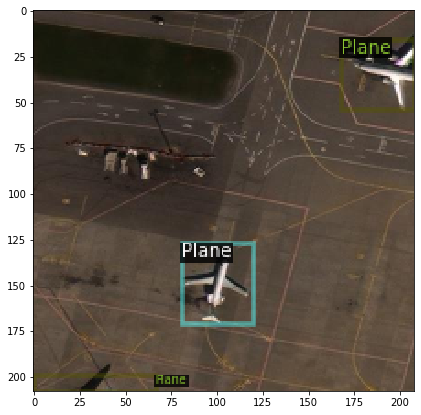

In [5]:
# Plot image and metdata 

for d in random.sample(dataset_dicts, 1):
        file_name = d['image'][0]['file_name']
        img = cv2.imread(file_name)
        plt.figure(figsize=(7,7))
        visualizer = Visualizer(img[:, :, ::-1], metadata=plane_metadata, scale=0.5)
        vis = visualizer.draw_dataset_dict(d)
        plt.imshow(vis.get_image())